In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
filename = '/content/drive/MyDrive/python/public_bicycle/seoul_data.csv'
seoul = pd.read_csv(filename)

In [ ]:
seoul['day'] = ((seoul.index) % 7) // 5

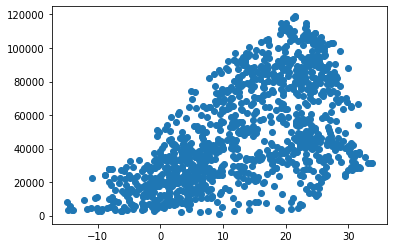

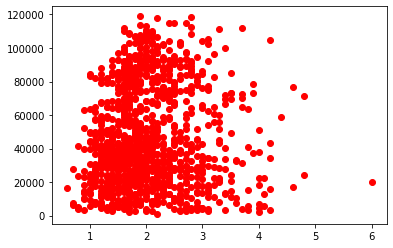

In [ ]:
plt.plot(seoul['wind_speed'], seoul['counts'], 'ro')

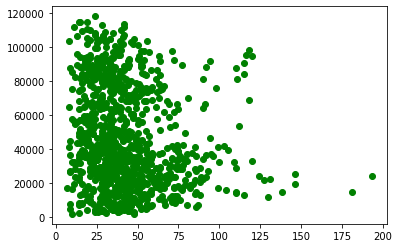

In [ ]:
plt.plot(seoul['dust'], seoul['counts'], 'go')

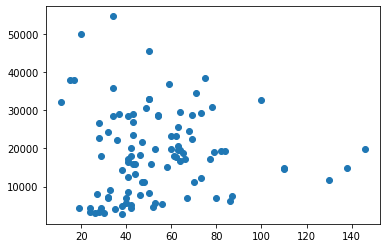

In [ ]:
test1 = seoul.loc[seoul['rainfall'] == 0].loc[seoul['month'] == 1].loc[seoul['dust'] < 150]
plt.plot(test1['dust'], test1['counts'], 'o')

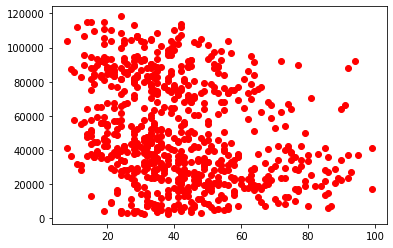

In [ ]:
test1 = seoul.loc[seoul['dust'] < 100].loc[seoul['rainfall'] == 0]
plt.plot(test1['dust'], test1['counts'], 'ro')

<BarContainer object of 1127 artists>

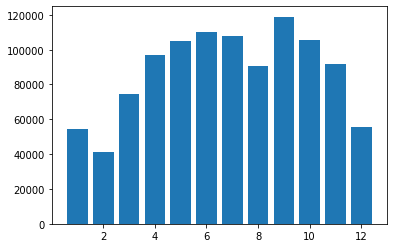

In [ ]:
plt.bar(seoul['month'], seoul['counts'])

In [ ]:
seoul['dust'] = seoul['dust'].fillna(seoul['dust'].mean())

In [ ]:
list(seoul['dust'])

In [ ]:
seoul['date'] = seoul['date'].str.replace("-", "")

In [ ]:
seoul_data = np.array(seoul, dtype=np.float32)
print(type(seoul_data))

In [ ]:
xData = seoul_data[:, [2,5,10,13]]
print(type(xData))
print(xData)

In [ ]:
yData = seoul_data[:, [1]]
print(yData)

In [ ]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 4]) # 변화요인(평균기온, 강수량, 미세먼지, 요일)
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1]) # 가격(실제값)

In [ ]:
a = tf.Variable(tf.random_uniform([4,1]), dtype=tf.float32)
b = tf.Variable(tf.random_uniform([1]), dtype=tf.float32)

In [ ]:
y = tf.matmul(X, a) + b

loss = tf.reduce_mean(tf.square(Y-y))

gradient_descent = tf.train.GradientDescentOptimizer(0.00001).minimize(loss)

In [ ]:
# 학습
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # 무조건 초기화

for i in range(2000001):
  loss_, y_, _ = sess.run([loss, y, gradient_descent], feed_dict={X: xData, Y : yData})
  if i % 10000 == 0:
    print('cnt : %6d, loss : %12.3f, counts : %6d' %(i, loss_, y_[0]))

# 학습이 완료되면 학습된 학습 모델을 디스크에 저장
# Saver() : tensorflow에서 학습된 모델을 디스크에 저장 또는 불러올 때 사용하는 객체를 생성
saver = tf.train.Saver()
saver_path = saver.save(sess, 'saved.ckpt')
print('학습된 모델을 저장했습니다.')

cnt :      0, loss : 3157309696.000, counts :     30
cnt :  10000, loss : 596372800.000, counts :  12101
cnt :  20000, loss : 592338624.000, counts :  12418
cnt :  30000, loss : 588491584.000, counts :  12728
cnt :  40000, loss : 584822400.000, counts :  13031
cnt :  50000, loss : 581322176.000, counts :  13327
cnt :  60000, loss : 577982656.000, counts :  13617
cnt :  70000, loss : 574796160.000, counts :  13901
cnt :  80000, loss : 571753920.000, counts :  14178
cnt :  90000, loss : 568851776.000, counts :  14450
cnt : 100000, loss : 566080128.000, counts :  14715
cnt : 110000, loss : 563434944.000, counts :  14975
cnt : 120000, loss : 560907776.000, counts :  15229
cnt : 130000, loss : 558496192.000, counts :  15478
cnt : 140000, loss : 556192000.000, counts :  15721
cnt : 150000, loss : 553991104.000, counts :  15959
cnt : 160000, loss : 551889664.000, counts :  16192
cnt : 170000, loss : 549881472.000, counts :  16420
cnt : 180000, loss : 547962368.000, counts :  16643
cnt : 19000